In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install -r /content/drive/MyDrive/stockprice/requirements.txt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 37.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.3/147.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!git clone https://github.com/ranahaani/GNews.git /content/drive/MyDrive/stockprice/GNews
# used this for getting the news

Cloning into '/content/drive/MyDrive/stockprice/GNews'...
remote: Enumerating objects: 1020, done.
remote: Counting objects: 100% (207/207), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 1020 (delta 168), reused 134 (delta 134), pack-reused 813 (from 3)
Receiving objects: 100% (1020/1020), 474.04 KiB | 3.92 MiB/s, done.
Resolving deltas: 100% (471/471), done.


In [4]:
sys.path.append('/content/drive/MyDrive/stockprice/GNews/gnews')

In [8]:
#sari imports
import sys
import csv
import time
import requests
# from gnews import GNews
from datetime import datetime, timedelta
from bs4 import BeautifulSoup
import pandas as pd

In [10]:
def get_sp500_companies():
    url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    table = soup.find('table', {'class': 'wikitable'})
    companies = []

    for row in table.find_all('tr')[1:]:
        cols = row.find_all('td')
        if len(cols) > 1:
            ticker = cols[0].text.strip()
            name = cols[1].text.strip()
            companies.append((ticker, name))

    return companies

In [11]:
companies_list = get_sp500_companies()
print(companies_list)

[('MMM', '3M'), ('AOS', 'A. O. Smith'), ('ABT', 'Abbott Laboratories'), ('ABBV', 'AbbVie'), ('ACN', 'Accenture'), ('ADBE', 'Adobe Inc.'), ('AMD', 'Advanced Micro Devices'), ('AES', 'AES Corporation'), ('AFL', 'Aflac'), ('A', 'Agilent Technologies'), ('APD', 'Air Products'), ('ABNB', 'Airbnb'), ('AKAM', 'Akamai Technologies'), ('ALB', 'Albemarle Corporation'), ('ARE', 'Alexandria Real Estate Equities'), ('ALGN', 'Align Technology'), ('ALLE', 'Allegion'), ('LNT', 'Alliant Energy'), ('ALL', 'Allstate'), ('GOOGL', 'Alphabet Inc. (Class A)'), ('GOOG', 'Alphabet Inc. (Class C)'), ('MO', 'Altria'), ('AMZN', 'Amazon'), ('AMCR', 'Amcor'), ('AEE', 'Ameren'), ('AEP', 'American Electric Power'), ('AXP', 'American Express'), ('AIG', 'American International Group'), ('AMT', 'American Tower'), ('AWK', 'American Water Works'), ('AMP', 'Ameriprise Financial'), ('AME', 'Ametek'), ('AMGN', 'Amgen'), ('APH', 'Amphenol'), ('ADI', 'Analog Devices'), ('ANSS', 'Ansys'), ('AON', 'Aon plc'), ('APA', 'APA Corpor

In [ ]:
def get_company_news(ticker_symbol: str, company_name: str, start_date: str, end_date: str, max_results: int = 100):
    try:
        google_news = GNews(language='en', country='US', max_results=max_results)

        news = google_news.get_news(company_name)

        news_data = []
        for article in news:
            article_date = article['published date']
            article_datetime = datetime.strptime(article_date, '%a, %d %b %Y %H:%M:%S GMT')

            if start_date <= article_datetime <= end_date:
                news_data.append({
                    'title': article['title'],
                    'description': article['description'],
                    'published_date': article_date,
                    'author': article.get('author', 'Unknown'),
                    'source': article['publisher']['title'],
                    'url': article['url'],
                    'ticker': ticker_symbol,
                    'company_name': company_name
                })

        return news_data

    except Exception as e:
        print(f"Failed to fetch news for '{company_name}': {e}")
        return []

def save_news_to_csv(news_data, filename='company_news_data.csv'):
  if news_data:
      keys = news_data[0].keys()

      with open(filename, mode='a', newline='', encoding='utf-8') as file:
          writer = csv.DictWriter(file, fieldnames=keys)

          if file.tell() == 0:
              writer.writeheader()

          writer.writerows(news_data)
def fetch_and_store_news(companies_list, years_back=5):
    end_date = datetime.now()
    start_date = end_date - timedelta(days=365 * years_back)

    for ticker_symbol, company_name in companies_list:
        print(f"Fetching news for {company_name} ({ticker_symbol})...")

        news_data = get_company_news(ticker_symbol, company_name, start_date, end_date)

        if news_data:
            save_news_to_csv(news_data)
            print(f"Saved {len(news_data)} articles for {company_name} ({ticker_symbol}).")

        time.sleep(5)

In [ ]:
fetch_and_store_news(companies_list)

Fetching news for 3M (MMM)...
Saved 100 articles for 3M (MMM).
Fetching news for A. O. Smith (AOS)...
Saved 100 articles for A. O. Smith (AOS).
Fetching news for Abbott Laboratories (ABT)...
Saved 100 articles for Abbott Laboratories (ABT).
Fetching news for AbbVie (ABBV)...
Saved 99 articles for AbbVie (ABBV).
Fetching news for Accenture (ACN)...
Saved 100 articles for Accenture (ACN).
Fetching news for Adobe Inc. (ADBE)...
Saved 100 articles for Adobe Inc. (ADBE).
Fetching news for Advanced Micro Devices (AMD)...
Saved 100 articles for Advanced Micro Devices (AMD).
Fetching news for AES Corporation (AES)...
Saved 100 articles for AES Corporation (AES).
Fetching news for Aflac (AFL)...
Saved 100 articles for Aflac (AFL).
Fetching news for Agilent Technologies (A)...
Saved 100 articles for Agilent Technologies (A).
Fetching news for Air Products (APD)...
Saved 100 articles for Air Products (APD).
Fetching news for Airbnb (ABNB)...
Saved 100 articles for Airbnb (ABNB).
Fetching news for

In [13]:
from transformers import BertTokenizer, BertForSequenceClassification, TextClassificationPipeline
import torch
import numpy as np

model_name = "ProsusAI/finbert"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)
device = 0 if torch.cuda.is_available() else -1
pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer, device=device, truncation=True, max_length=512)

def split_token(text, tokenizer, max_tokens=512):
    sentences = [s.strip() for s in text.split('.') if s.strip()]
    chunks = []
    current_chunk = ""

    for sentence in sentences:
        if not sentence.endswith('.'):
            sentence += '.'

        tentative_chunk = current_chunk + " " + sentence if current_chunk else sentence
        token_count = len(tokenizer.encode(tentative_chunk, add_special_tokens=False))

        if token_count <= max_tokens:
            current_chunk = tentative_chunk
        else:
            if current_chunk:
                chunks.append(current_chunk.strip())
            current_chunk = sentence

    if current_chunk:
        chunks.append(current_chunk.strip())

    return chunks

def get_news_sentiment(news_input):
    if isinstance(news_input, str):
        news_input = [news_input]

    results = []

    for text in news_input:
        chunks = split_token(text, tokenizer)
        chunk_results = pipe(chunks)

        label_scores = {}
        for res in chunk_results:
            label = res['label']
            label_scores.setdefault(label, []).append(res['score'])

        avg_scores = {label: np.mean(scores) for label, scores in label_scores.items()}
        top_label = max(avg_scores.items(), key=lambda x: x[1])

        results.append({
            'label': top_label[0],
            'score': round(top_label[1], 4),
        })

    return results


In [23]:
import pandas as pd
import numpy as np
import yfinance as yf
import os
def generate_sentiment_dataset(news_csv_path):
    output_dir="/content/drive/MyDrive/stockprice/output_data"
    os.makedirs(output_dir, exist_ok=True)
    news_df = pd.read_csv(news_csv_path)
    news_df['published_date'] = news_df['published_date'].apply(
        lambda x: datetime.strptime(x, '%a, %d %b %Y %H:%M:%S GMT'))

    companies = get_sp500_companies()
    end_date = datetime.now()
    start_date = end_date - timedelta(days=30)

    for ticker, name in companies:
        try:
            print(f"\nProcessing {ticker} ({name})")
            stock_df = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))

            if stock_df.empty:
                print(f"No data for {ticker}")
                continue

            stock_df.reset_index(inplace=True)
            stock_df['Date'] = pd.to_datetime(stock_df['Date'])
            news_df['published_date'] = pd.to_datetime(news_df['published_date']).dt.tz_localize(None)
            stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.tz_localize(None)

            rows = []
            for date, row in stock_df.set_index('Date').iterrows():
                price_info = row.to_dict()
                # print(date)
                # return
                related_news = news_df[
                    (news_df['ticker'] == ticker) &
                    (news_df['published_date'] < date)
                ]

                sentiment_score = 0
                sentiment_label = "neutral"

                if not related_news.empty:
                    descriptions = related_news['description'].fillna("").tolist()
                    sentiments = get_news_sentiment(descriptions)
                    scores = [s['score'] * (1 if s['label'] == 'positive' else -1 if s['label'] == 'negative' else 0) for s in sentiments]

                    if scores:
                        sentiment_score = np.mean(scores)
                        sentiment_label = "positive" if sentiment_score > 0.05 else "negative" if sentiment_score < -0.05 else "neutral"

                price_info['sentiment_score'] = round(sentiment_score, 4)
                price_info['sentiment_label'] = sentiment_label
                rows.append(price_info)

            if rows:
                df_out = pd.DataFrame(rows)
                df_out.to_csv(f"{output_dir}/{ticker}_sentiment_data.csv", index=False)
                print(f"Saved: {output_dir}/{ticker}_sentiment_data.csv")

        except Exception as e:
            print(f"Error processing {ticker}: {e}")

In [24]:
generate_sentiment_dataset("/content/drive/MyDrive/stockprice/company_news_data.csv")

[*********************100%***********************]  1 of 1 completed


Processing MMM (3M)



[*********************100%***********************]  1 of 1 completed

Saved: /content/drive/MyDrive/stockprice/output_data/MMM_sentiment_data.csv

Processing AOS (A. O. Smith)



[*********************100%***********************]  1 of 1 completed

Saved: /content/drive/MyDrive/stockprice/output_data/AOS_sentiment_data.csv

Processing ABT (Abbott Laboratories)



[*********************100%***********************]  1 of 1 completed

Saved: /content/drive/MyDrive/stockprice/output_data/ABT_sentiment_data.csv

Processing ABBV (AbbVie)



[*********************100%***********************]  1 of 1 completed

Saved: /content/drive/MyDrive/stockprice/output_data/ABBV_sentiment_data.csv

Processing ACN (Accenture)



[*********************100%***********************]  1 of 1 completed

Saved: /content/drive/MyDrive/stockprice/output_data/ACN_sentiment_data.csv

Processing ADBE (Adobe Inc.)



[*********************100%***********************]  1 of 1 completed

Saved: /content/drive/MyDrive/stockprice/output_data/ADBE_sentiment_data.csv

Processing AMD (Advanced Micro Devices)



[*********************100%***********************]  1 of 1 completed

Saved: /content/drive/MyDrive/stockprice/output_data/AMD_sentiment_data.csv

Processing AES (AES Corporation)



[*********************100%***********************]  1 of 1 completed

Saved: /content/drive/MyDrive/stockprice/output_data/AES_sentiment_data.csv

Processing AFL (Aflac)



[*********************100%***********************]  1 of 1 completed

Saved: /content/drive/MyDrive/stockprice/output_data/AFL_sentiment_data.csv

Processing A (Agilent Technologies)



[*********************100%***********************]  1 of 1 completed

Saved: /content/drive/MyDrive/stockprice/output_data/A_sentiment_data.csv

Processing APD (Air Products)



[*********************100%***********************]  1 of 1 completed

Saved: /content/drive/MyDrive/stockprice/output_data/APD_sentiment_data.csv

Processing ABNB (Airbnb)



[*********************100%***********************]  1 of 1 completed

Saved: /content/drive/MyDrive/stockprice/output_data/ABNB_sentiment_data.csv

Processing AKAM (Akamai Technologies)



[*********************100%***********************]  1 of 1 completed

Saved: /content/drive/MyDrive/stockprice/output_data/AKAM_sentiment_data.csv

Processing ALB (Albemarle Corporation)



[*********************100%***********************]  1 of 1 completed

Saved: /content/drive/MyDrive/stockprice/output_data/ALB_sentiment_data.csv

Processing ARE (Alexandria Real Estate Equities)



[*********************100%***********************]  1 of 1 completed

Saved: /content/drive/MyDrive/stockprice/output_data/ARE_sentiment_data.csv

Processing ALGN (Align Technology)



[*********************100%***********************]  1 of 1 completed

Saved: /content/drive/MyDrive/stockprice/output_data/ALGN_sentiment_data.csv

Processing ALLE (Allegion)



[*********************100%***********************]  1 of 1 completed

Saved: /content/drive/MyDrive/stockprice/output_data/ALLE_sentiment_data.csv

Processing LNT (Alliant Energy)



[*********************100%***********************]  1 of 1 completed

Saved: /content/drive/MyDrive/stockprice/output_data/LNT_sentiment_data.csv

Processing ALL (Allstate)



[*********************100%***********************]  1 of 1 completed

Saved: /content/drive/MyDrive/stockprice/output_data/ALL_sentiment_data.csv

Processing GOOGL (Alphabet Inc. (Class A))



[*********************100%***********************]  1 of 1 completed

Saved: /content/drive/MyDrive/stockprice/output_data/GOOGL_sentiment_data.csv

Processing GOOG (Alphabet Inc. (Class C))




KeyboardInterrupt



In [ ]:
headlines = [
"""
      Parsippany, New Jersey-based Zoetis Inc. (ZTS) discovers, develops, and commercializes animal health medicines, vaccines, and diagnostic products and services. With a market cap of $75.4 billion, Zoetis operates as the largest producer of medicine and vaccines for pets and livestock in the world, with operations spanning over 100 countries in North America, Europe, and internationally.
      The healthcare giant is set to announce its fourth-quarter results before the market opens on Thursday, Feb. 13. Ahead of the event, analysts expect ZTS to report a non-GAAP profit of $1.38 per share, up 11.3% from $1.24 per share reported in the year-ago quarter. While the company has surpassed Wall Streetâ€™s bottom-line projections in three of the past four quarters, it has missed the estimates on one other occasion.
      For the full fiscal 2024, analysts expect Zoetis to deliver an adjusted EPS of $5.91, up 11.1% from $5.32 in fiscal 2023. While in fiscal 2025, its earnings are expected to grow nearly 8% year-over-year to $6.38 per share.

      ZTS stock prices have declined 12.2% over the past 52 weeks, substantially underperforming the Healthcare Select Sector SPDR Fundâ€™s (XLV) 1% gains and the S&P 500 Indexâ€™s ($SPX) 24.6% surge during the same time frame.

      Despite reporting better-than-expected results Zoetisâ€™ stock prices dipped 3.7% after the release of its Q3 results on Nov. 4. The company reported a robust 11% year-on-year growth in revenue, reaching $2.4 billion. Zoetis has continued to observe strong growth in the U.S. as well as international markets. Its U.S. segment reported an impressive 15% growth in revenues to $1.3 billion, driven by strong demand for companion animal products. Sales of livestock products also increased, with a 7% growth in the international segment on a reported basis and 15% operationally.
      The company also reported an impressive growth in profitability with its adjusted net income growing 13.8% year-over-year, reaching $716 million and its adjusted EPS of $1.58 surpassed analystsâ€™ earnings estimates by a notable 8.2%. Moreover, observing the robust Q3 results and underlying strength in companion animal products, Zoetis raised its full-year guidance for revenue and adjusted EPS.
      The consensus opinion on ZTS stock is strongly bullish, with an overall â€œStrong Buyâ€ rating. Among the 17 analysts covering the stock, 15 recommend â€œStrong Buy,â€ one advises â€œModerate Buy,â€ and one suggests a â€œHoldâ€ rating. Its mean price target of $216.53 indicates a 27.8% upside potential from current price levels.
      The views and opinions expressed herein are the views and opinions of the author and do not necessarily reflect those of Nasdaq, Inc.
      This data feed is not available at this time.
"""
]

sentiment_results = get_news_sentiment(headlines)

for r in sentiment_results:
    print(r)


Token indices sequence length is longer than the specified maximum sequence length for this model (530 > 512). Running this sequence through the model will result in indexing errors


{'label': 'positive', 'score': np.float64(0.949)}


In [30]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import save_model
from sklearn.model_selection import train_test_split

def load_data(data_dir, features):
    all_data = []
    for file in os.listdir(data_dir):
        if file.endswith("_sentiment_data.csv"):
            df = pd.read_csv(os.path.join(data_dir, file), header=[0])
            df.columns = ['_'.join(col) if isinstance(col, tuple) or isinstance(col, list) else col for col in df.columns]
            for col in df.columns:
                if 'Close' in col and 'sentiment' not in col:
                    df.rename(columns={col: 'Close'}, inplace=True)
                elif 'Open' in col:
                    df.rename(columns={col: 'Open'}, inplace=True)
                elif 'High' in col:
                    df.rename(columns={col: 'High'}, inplace=True)
                elif 'Low' in col:
                    df.rename(columns={col: 'Low'}, inplace=True)
                elif 'Volume' in col:
                    df.rename(columns={col: 'Volume'}, inplace=True)
            all_data.append(df)

    data = pd.concat(all_data, ignore_index=True)
    data = data.dropna()

    sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
    data['sentiment_label_encoded'] = data['sentiment_label'].map(sentiment_map)

    missing = set(features) - set(data.columns)
    if missing:
        raise ValueError(f"Missing columns: {missing}")

    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data[features])

    return data_scaled, scaler

def get_model(input_shape):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(64),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def inverse_scale(scaler, scaled_values, feature_count):
    padded = np.zeros((len(scaled_values), feature_count))
    padded[:, 0] = scaled_values.flatten()
    return scaler.inverse_transform(padded)[:, 0]

def train_model(data_scaled, scaler, features, sequence_lengths, epochs_list, save_dir):
    mx_rmse = float('inf')
    mx_config = None
    mx_path = None

    for seq_len in sequence_lengths:
        X, y = [], []
        for i in range(seq_len, len(data_scaled)):
            X.append(data_scaled[i-seq_len:i])
            y.append(data_scaled[i][0])

        X = np.array(X)
        y = np.array(y)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

        for num_epochs in epochs_list:
            print(f"\nFOR sequence length {seq_len} and {num_epochs} epochs...")

            model = get_model((X.shape[1], X.shape[2]))
            history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=32, verbose=0, validation_data=(X_test, y_test))

            y_pred = model.predict(X_test)
            y_pred_inv = inverse_scale(scaler, y_pred, len(features))
            y_test_inv = inverse_scale(scaler, y_test, len(features))

            rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
            mae = mean_absolute_error(y_test_inv, y_pred_inv)
            r2 = r2_score(y_test_inv, y_pred_inv)

            print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}")

            if rmse < mx_rmse:
                mx_rmse = rmse
                mx_config = (seq_len, num_epochs)
                mx_path = os.path.join(save_dir, "best_model.h5")

                if os.path.exists(mx_path):
                    os.remove(mx_path)

                model.save(mx_path)
                print(f" New mx model saved to: {mx_path}")

    print(f"\n🏆 Best configuration: Sequence Length = {mx_config[0]}, Epochs = {mx_config[1]}, RMSE = {mx_rmse:.2f}")
    return mx_path, mx_config

data_dir = "/content/drive/MyDrive/stockprice/output_data"
save_dir = "/content/drive/MyDrive/stockprice/saved_models"
os.makedirs(save_dir, exist_ok=True)

features = ['Close', 'High', 'Low', 'Open', 'Volume', 'sentiment_score', 'sentiment_label_encoded']
sequence_lengths = [10, 20, 30, 40, 50]
epochs_list = [20, 30 , 50 , 76 , 100 ]

data_scaled, scaler = load_data(data_dir, features)
mx_path, mx_config = train_model(data_scaled, scaler, features, sequence_lengths, epochs_list, save_dir)



FOR sequence length 10 and 20 epochs...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step


RMSE: 31.49, MAE: 20.86, R²: 0.6099
 New mx model saved to: /content/drive/MyDrive/stockprice/saved_models/best_model.h5

FOR sequence length 10 and 30 epochs...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step


RMSE: 29.62, MAE: 18.55, R²: 0.6548
 New mx model saved to: /content/drive/MyDrive/stockprice/saved_models/best_model.h5

FOR sequence length 10 and 50 epochs...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step


RMSE: 25.48, MAE: 13.56, R²: 0.7446
 New mx model saved to: /content/drive/MyDrive/stockprice/saved_models/best_model.h5

FOR sequence length 10 and 76 epochs...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step


RMSE: 24.25, MAE: 13.95, R²: 0.7686
 New mx model saved to: /content/drive/MyDrive/stockprice/saved_models/best_model.h5

FOR sequence length 10 and 100 epochs...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step


RMSE: 22.82, MAE: 11.68, R²: 0.7951
 New mx model saved to: /content/drive/MyDrive/stockprice/saved_models/best_model.h5

FOR sequence length 20 and 20 epochs...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 300ms/step
RMSE: 38.03, MAE: 27.77, R²: 0.4453

FOR sequence length 20 and 30 epochs...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step
RMSE: 30.73, MAE: 20.23, R²: 0.6380

FOR sequence length 20 and 50 epochs...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step
RMSE: 29.92, MAE: 19.84, R²: 0.6566

FOR sequence length 20 and 76 epochs...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step
RMSE: 28.09, MAE: 17.43, R²: 0.6975

FOR sequence length 20 and 100 epochs...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 292ms/step
RMSE: 29.94, MAE: 21.15, R²: 0.6561

FOR sequence length 30 and 20 epochs...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step
RMSE: 38.52, MAE: 27.85, R²: 0.4457

FOR sequence length 30 and 30 epochs...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step
RMSE: 32.66, MAE: 21.65, R²: 0.6014

FOR sequence length 30 and 50 epochs...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step
RMSE: 30.61, MAE: 21.37, R²: 0.6500

FOR sequence length 30 and 76 epochs...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step
RMSE: 30.19, MAE: 20.92, R²: 0.6596

FOR sequence length 30 and 100 epochs...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step
RMSE: 28.07, MAE: 18.67, R²: 0.7056

FOR sequence length 40 and 20 epochs...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step
RMSE: 35.59, MAE: 25.17, R²: 0.5400

FOR sequence length 40 and 30 epochs...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step
RMSE: 32.89, MAE: 21.29, R²: 0.6070

FOR sequence length 40 and 50 epochs...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step
RMSE: 31.63, MAE: 20.01, R²: 0.6367

FOR sequence length 40 and 76 epochs...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 301ms/step
RMSE: 28.77, MAE: 19.81, R²: 0.6995

FOR sequence length 40 and 100 epochs...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step
RMSE: 27.97, MAE: 19.62, R²: 0.7159

FOR sequence length 50 and 20 epochs...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step
RMSE: 40.57, MAE: 30.61, R²: 0.4200

FOR sequence length 50 and 30 epochs...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 336ms/step
RMSE: 39.41, MAE: 30.03, R²: 0.4525

FOR sequence length 50 and 50 epochs...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step
RMSE: 33.43, MAE: 23.51, R²: 0.6061

FOR sequence length 50 and 76 epochs...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step
RMSE: 29.12, MAE: 18.77, R²: 0.7011

FOR sequence length 50 and 100 epochs...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step
RMSE: 28.89, MAE: 19.29, R²: 0.7058

🏆 Best configuration: Sequence Length = 10, Epochs = 100, RMSE = 22.82


In [46]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.losses import MeanSquaredError
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def directional_accuracy(y_true, y_pred):
  window = 5
  if len(y_true) < window + 1:
      return 0.0

  y_true_smooth = pd.Series(y_true).rolling(window=window).mean().to_numpy()
  y_pred_smooth = pd.Series(y_pred).rolling(window=window).mean().to_numpy()

  correct = 0
  total = 0

  for i in range(window, len(y_true_smooth) - 1):
      actual_diff = y_true_smooth[i + 1] - y_true_smooth[i]
      pred_diff = y_pred_smooth[i + 1] - y_pred_smooth[i]

      if np.isnan(actual_diff) or np.isnan(pred_diff):
          continue

      if (actual_diff >= 0 and pred_diff >= 0) or (actual_diff < 0 and pred_diff < 0):
          correct += 1
      total += 1

  return (correct / total) * 100 if total > 0 else 0.0

def best_model(model_path, sequence_length, data_scaled, scaler, features):
    model = load_model(model_path, custom_objects={"mse": MeanSquaredError()})

    X, y = [], []
    for i in range(sequence_length, len(data_scaled)):
        X.append(data_scaled[i-sequence_length:i])
        y.append(data_scaled[i][0])  # Close price

    X = np.array(X)
    y = np.array(y)

    split_index = int(len(X) * 0.8)
    X_test = X[split_index:]
    y_test = y[split_index:]

    y_pred = model.predict(X_test)
    y_pred_inv = inverse_scale(scaler, y_pred, len(features))
    y_test_inv = inverse_scale(scaler, y_test, len(features))

    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    r2 = r2_score(y_test_inv, y_pred_inv)
    da = directional_accuracy(y_test_inv, y_pred_inv)

    print(f"MAE:  {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.4f}")
    print(f"Directional Accuracy: {da:.2f}%")

    plt.figure(figsize=(10, 6))
    plt.plot(y_test_inv, label="Actual")
    plt.plot(y_pred_inv, label="Predicted")
    plt.title("Actual vs Predicted Close Prices")
    plt.xlabel("Time")
    plt.ylabel("Close Price")
    plt.legend()
    plt.grid(True)
    plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 353ms/step
MAE:  11.68
RMSE: 22.82
R²:   0.7951
Directional Accuracy: 70.59%


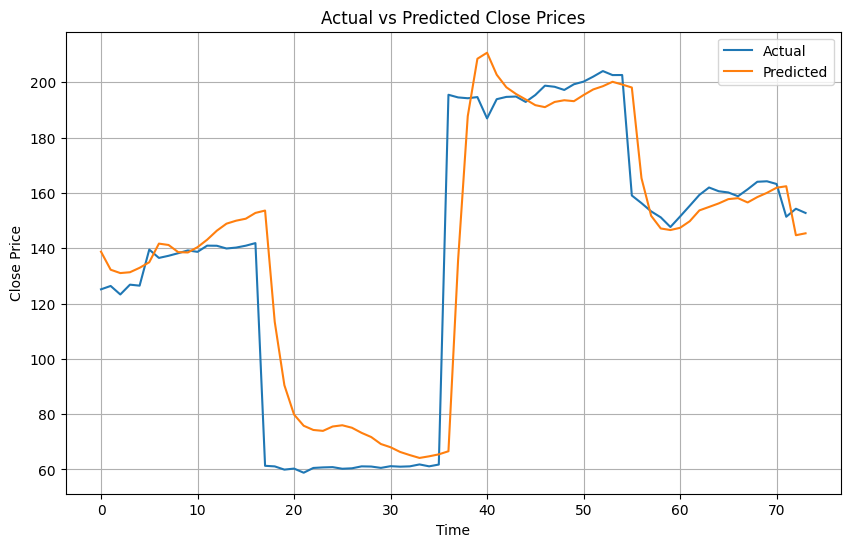

In [47]:
best_model(
    model_path="/content/drive/MyDrive/stockprice/saved_models/best_model.h5",
    sequence_length=10,
    data_scaled=data_scaled,
    scaler=scaler,
    features=features
)
